# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [46]:
'''!kaggle datasets download -d khaledzsa/bus-breakdown-and-delays
!unzip bus-breakdown-and-delays.zip'''

'!kaggle datasets download -d khaledzsa/bus-breakdown-and-delays\n!unzip bus-breakdown-and-delays.zip'

## Importing Libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import models , layers
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OrdinalEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')

df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [50]:
df.shape

(147972, 21)

In [51]:
df.describe

<bound method NDFrame.describe of        School_Year  Busbreakdown_ID             Run_Type  Bus_No Route_Number  \
0        2015-2016          1224901             Pre-K/EI     811            1   
1        2015-2016          1225098             Pre-K/EI    9302            1   
2        2015-2016          1215800             Pre-K/EI     358            2   
3        2015-2016          1215511             Pre-K/EI     331            2   
4        2015-2016          1215828             Pre-K/EI     332            2   
...            ...              ...                  ...     ...          ...   
147967   2016-2017          1338452             Pre-K/EI    9345            2   
147968   2016-2017          1341521             Pre-K/EI    0001            5   
147969   2016-2017          1353044    Special Ed PM Run  GC0112         X928   
147970   2016-2017          1353045    Special Ed PM Run   5525D         Q920   
147971   2016-2017          1353046  Project Read PM Run    2530         K617   

               Reason Schools_Serviced             Occurred_On  \
0               Other             C353  10/26/2015 08:30:00 AM   
1       Heavy Traffic             C814  10/27/2015 07:10:00 AM   
2       Heavy Traffic             C195  09/18/2015 07:36:00 AM   
3               Other             C178  09/17/2015 08:08:00 AM   
4               Other             S176  09/18/2015 07:39:00 AM   
...               ...              ...                     ...   
147967  Heavy Traffic             C530  04/05/2017 08:00:00 AM   
147968  Heavy Traffic             C579  04/24/2017 07:42:00 AM   
147969  Heavy Traffic            09003  05/25/2017 04:22:00 PM   
147970    Won`t Start            24457  05/25/2017 04:27:00 PM   
147971          Other            21436  05/25/2017 04:36:00 PM   

                    Created_On      Boro  ... How_Long_Delayed  \
0       10/26/2015 08:40:00 AM     Bronx  ...        10MINUTES   
1       10/27/2015 07:11:00 AM     Bronx  ...       25 MINUTES   
2       09/18/2015 07:38:00 AM     Bronx  ...       15 MINUTES   
3       09/17/2015 08:12:00 AM     Bronx  ...       10 minutes   
4       09/18/2015 07:45:00 AM     Bronx  ...        10MINUTES   
...                        ...       ...  ...              ...   
147967  04/05/2017 08:10:00 AM     Bronx  ...            15-20   
147968  04/24/2017 07:44:00 AM     Bronx  ...          20 MINS   
147969  05/25/2017 04:28:00 PM     Bronx  ...        20-25MINS   
147970  05/25/2017 04:30:00 PM    Queens  ...              NaN   
147971  05/25/2017 04:37:00 PM  Brooklyn  ...            45min   

       Number_Of_Students_On_The_Bus  Has_Contractor_Notified_Schools  \
0                                  5                              Yes   
1                                  3                              Yes   
2                                 12                              Yes   
3                                 11                              Yes   
4                                 12                              Yes   
...                              ...                              ...   
147967                             7                              Yes   
147968                             0                              Yes   
147969                             0                              Yes   
147970                             0                              Yes   
147971                             7                              Yes   

       Has_Contractor_Notified_Parents Have_You_Alerted_OPT  \
0                                  Yes                   No   
1                                  Yes                   No   
2                                  Yes                  Yes   
3                                  Yes                  Yes   
4                                  Yes                   No   
...                                ...                  ...   
147967                             Yes                   No   
147968                    

In [52]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


<Axes: xlabel='Breakdown_or_Running_Late', ylabel='count'>

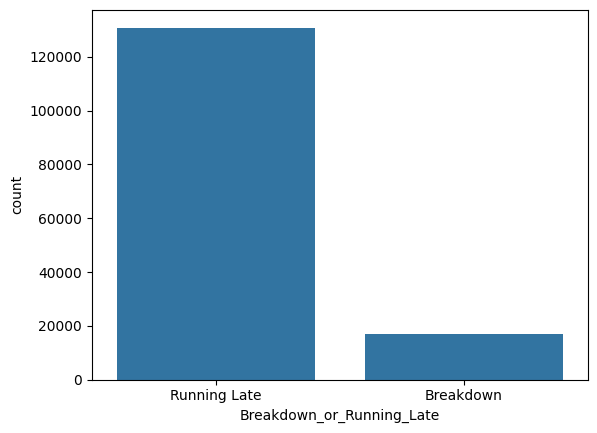

In [53]:
sns.countplot(x='Breakdown_or_Running_Late', data=df)

<Axes: >

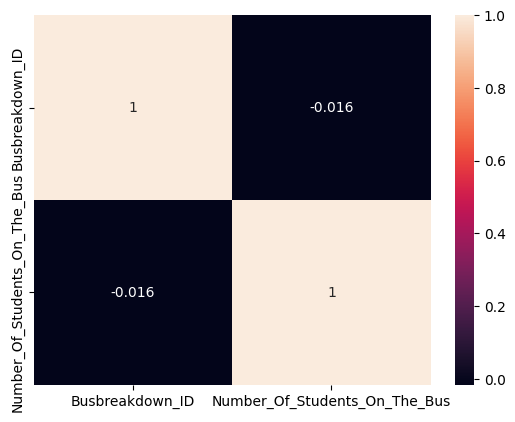

In [54]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

* **Handle Missing Values**



In [55]:
df = df.drop(['Incident_Number', 'Busbreakdown_ID' ] , axis=1)

In [56]:
numerical = df.select_dtypes(include=['int64'])
categorical = df.select_dtypes(include=['object'])

In [57]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
categorical = pd.DataFrame(imputer.fit_transform(categorical), columns=categorical.columns)


In [58]:
df = pd.concat([numerical, categorical], axis=1)

df.isnull().sum()

,0
Number_Of_Students_On_The_Bus,0
School_Year,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0


* **Encode Categorical Variables**


In [59]:
ordinal = OrdinalEncoder()
categorical = pd.DataFrame(ordinal.fit_transform(categorical), columns=categorical.columns)

df = pd.concat([numerical, categorical], axis=1)

df.head()

,Number_Of_Students_On_The_Bus,School_Year,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,5,0.0,3.0,7481.0,77.0,6.0,5003.0,56392.0,61017.0,1.0,27.0,191.0,1.0,1.0,0.0,61017.0,116763.0,1.0,0.0
1,3,0.0,3.0,8114.0,77.0,3.0,5071.0,56698.0,61329.0,1.0,27.0,837.0,1.0,1.0,0.0,61329.0,117361.0,1.0,0.0
2,12,0.0,3.0,4662.0,209.0,3.0,4969.0,48207.0,51829.0,1.0,27.0,335.0,1.0,1.0,1.0,51829.0,98486.0,1.0,0.0
3,11,0.0,3.0,4547.0,209.0,6.0,4968.0,48064.0,51656.0,1.0,27.0,110.0,1.0,1.0,1.0,51656.0,98208.0,1.0,0.0
4,12,0.0,3.0,4554.0,209.0,6.0,5149.0,48210.0,51836.0,1.0,27.0,191.0,1.0,1.0,0.0,51836.0,98548.0,1.0,0.0


* **Scale and Normalize Data**


In [60]:
'''scaling = StandardScaler()
numerical = pd.DataFrame(scaling.fit_transform(numerical), columns=numerical.columns)

df = pd.concat([numerical , categorical], axis=1)

df.head()'''

'scaling = StandardScaler()\nnumerical = pd.DataFrame(scaling.fit_transform(numerical), columns=numerical.columns)\n\ndf = pd.concat([numerical , categorical], axis=1)\n\ndf.head()'

* **Remove Duplicates**


In [61]:
df.duplicated().sum()

35

In [62]:
df = df.drop_duplicates()

In [63]:
df.duplicated().sum()

0

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [64]:
X = df.drop('Breakdown_or_Running_Late',axis=1)
y = df['Breakdown_or_Running_Late']

In [82]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [83]:
X_train , X_test , y_train , y_test = train_test_split(X_resampled , y_resampled , test_size=0.15 , random_state=42)
X_train , X_val , y_train , y_val = train_test_split(X_train , y_train , test_size=0.15 , random_state=42)

In [84]:
y_resampled.value_counts()

,count
Breakdown_or_Running_Late,
1.0,130824
0.0,130824


In [85]:
y

,Breakdown_or_Running_Late
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
147967,1.0
147968,1.0
147969,1.0
147970,0.0


## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [86]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [87]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [88]:
history = model.fit(X_train, y_train, epochs=20, batch_size=100, validation_data=(X_val, y_val))

Epoch 1/20
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5819 - loss: 50.1826 - val_accuracy: 0.6430 - val_loss: 1.1122
Epoch 2/20
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6057 - loss: 2.7044 - val_accuracy: 0.5091 - val_loss: 3.1266
Epoch 3/20
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6452 - loss: 1.1496 - val_accuracy: 0.5860 - val_loss: 1.1480
Epoch 4/20
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7410 - loss: 0.6112 - val_accuracy: 0.7677 - val_loss: 0.5616
Epoch 5/20
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7614 - loss: 0.5736 - val_accuracy: 0.8217 - val_loss: 0.3853
Epoch 6/20
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7853 - loss: 0.5859 - val_accuracy: 0.8103 - val_loss: 0.4422
Epoch 7/20
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7982 - loss: 0.4364 - val_accuracy: 0.8474 - val_loss: 0.3497
Epoch 8/20
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7959 - loss: 0.6058 -

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [89]:
model.evaluate(X_test, y_test)

1227/1227 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8744 - loss: 0.3062


[0.29771992564201355, 0.8776243329048157]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [90]:
model.predict(X_test)

1227/1227 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


array([[0.07714623],
       [0.10725915],
       [0.21508761],
       ...,
       [0.9938617 ],
       [0.23830022],
       [0.99887127]], dtype=float32)

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

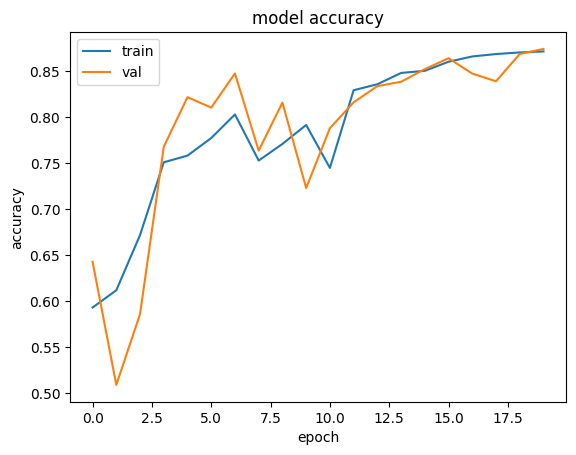

In [91]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Save the Model
Save the trained model for submission.

In [92]:
model.save('my_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

- at the end i got good model but every time i run it i got diffrent accurecy that becuse the data split